In [3]:
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
def percentile(arr, p):
    """Returns the pth percentile of the input array (the value that is at
    least as great as p% of the values in the array).

    If arr is not provided, percentile returns itself curried with p

    >>> percentile([1, 3, 5, 9], 74.9)
    5
    >>> percentile([1, 3, 5, 9], 75)
    5
    >>> percentile([1, 3, 5, 9], 75.1)
    9

    """
    if p == 0:
        return min(arr)
    assert 0 < p <= 100, 'Percentile requires a percent'
    i = (p/100) * len(arr)
    return sorted(arr)[math.ceil(i) - 1]




## Average (Mean) ##

In [5]:
values = np.array([2, 3, 3, 9])

In [4]:
sum(values)/len(values)

4.25

In [5]:
np.average(values)

4.25

In [6]:
np.mean(values)

4.25

In [7]:
(2 + 3 + 3 + 9)/4

4.25

In [8]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [9]:
values_table = pd.DataFrame({'value': values })
values_table

,value
0,2
1,3
2,3
3,9


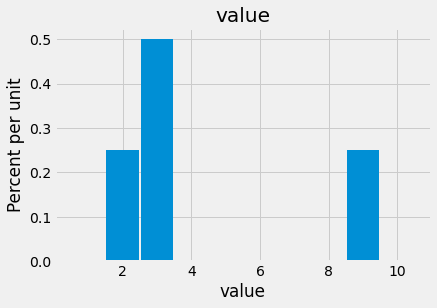

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(bins = bins_for_display,density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('value')
plt.show()

In [11]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)

In [12]:
new_vals = np.append(np.append(twos, threes), nines)

In [13]:
len(new_vals)

40

In [14]:
new_vals

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9.])

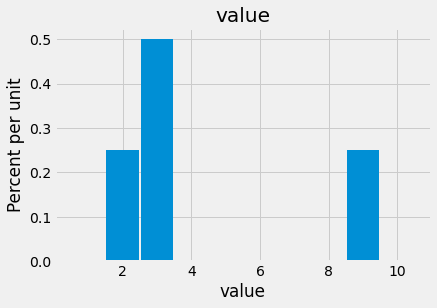

In [15]:
pd.DataFrame({'value': new_vals }).hist(bins = bins_for_display,density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('value')
plt.show()

 if two collections have the same distribution, then they have the same mean:

In [16]:
np.average(values)

4.25

In [17]:
np.average(new_vals)

4.25

Proportions are Means:

In [18]:
zero_one = np.array([1, 1, 1, 0])
np.mean(zero_one)

0.75

In [19]:
np.mean(np.array([True, True, True, False]))

0.75

Comparing Mean and Median: If the distribution is symmetric about a value, then that value is both the average and the median.If the histogram is skewed, then the mean is pulled away from the median in the direction of the tail:

In [20]:
symmetric = np.array([2, 3, 3, 4])

In [21]:
np.mean(symmetric)

3.0

In [22]:
percentile(symmetric, 50)

3

In [23]:
nba = pd.read_csv('nba2013.csv')

In [24]:
nba.columns

Index(['Name', 'Position', 'Height', 'Weight', 'Age in 2013'], dtype='object')

array([[<AxesSubplot:title={'center':'Height'}>]], dtype=object)

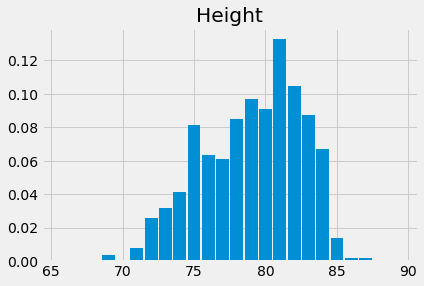

In [25]:
nba.hist('Height', bins=np.arange(65.5, 90.5), density=True, rwidth=0.9)

In [26]:
heights = nba['Height']
percentile(heights,50)

80

In [27]:
np.average(heights)

79.06534653465347

## Variance & Standard Deviation ##

In [7]:
sd_table = pd.DataFrame({'Value': values})
sd_table

,Value
0,2
1,3
2,3
3,9


In [9]:
average_value = np.average(sd_table['Value'])
average_value

4.25

In [10]:
deviations = values - average_value
sd_table['Deviation']= deviations
sd_table

,Value,Deviation
0,2,-2.25
1,3,-1.25
2,3,-1.25
3,9,4.75


In [11]:
sum(deviations)

0.0

In [12]:
sd_table['Squared Deviation']= deviations ** 2
sd_table

,Value,Deviation,Squared Deviation
0,2,-2.25,5.0625
1,3,-1.25,1.5625
2,3,-1.25,1.5625
3,9,4.75,22.5625


In [14]:
# Variance of the data

variance = np.mean(sd_table['Squared Deviation'])
variance

7.6875

In [15]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [35]:
np.std(values)

2.7726341266023544

In [16]:
np.var(values)

7.6875

In [37]:
nba = pd.read_csv('nba2013.csv')
nba

,Name,Position,Height,Weight,Age in 2013
0,DeQuan Jones,Guard,80,221,23
1,Darius Miller,Guard,80,235,23
2,Trevor Ariza,Guard,80,210,28
3,James Jones,Guard,80,215,32
4,Wesley Johnson,Guard,79,215,26
...,...,...,...,...,...
500,Joel Anthony,Center,81,245,31
501,Bismack Biyombo,Center,81,229,21
502,Luis Scola,Center,81,245,33
503,Lavoy Allen,Center,81,225,24


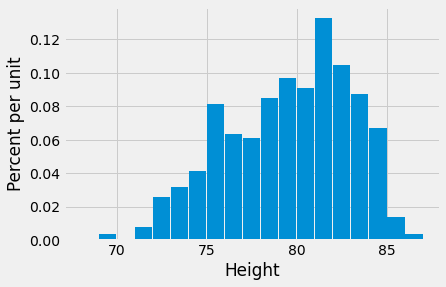

In [38]:
nba['Height'].hist(bins=np.arange(68, 88, 1), density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Height')
plt.show()

In [39]:
mean_height = np.mean(nba['Height'])
mean_height

79.06534653465347

In [40]:
sd_height = np.std(nba['Height'])
sd_height

3.450597183027555

In [41]:
nba.sort_values(by='Height', ascending=False).head(3)

,Name,Position,Height,Weight,Age in 2013
413,Hasheem Thabeet,Center,87,263,26
414,Roy Hibbert,Center,86,278,26
415,Alex Len,Center,85,255,20


The center Hasheem Thabeet of is the tallest player at a height of 87 inches. Thabeet was about 8 inches above the average height:

In [42]:
87 - mean_height

7.934653465346528

That’s a deviation from average, and it is about 2.3 times the standard deviation:

In [43]:
(87 - mean_height)/sd_height

2.299501519439792

In [44]:
nba.sort_values(by='Height').head(3)

,Name,Position,Height,Weight,Age in 2013
201,Nate Robinson,Guard,69,180,29
200,Isaiah Thomas,Guard,69,185,24
199,Phil Pressey,Guard,71,175,22


In [45]:
(69 - mean_height)/sd_height

-2.916986828877584

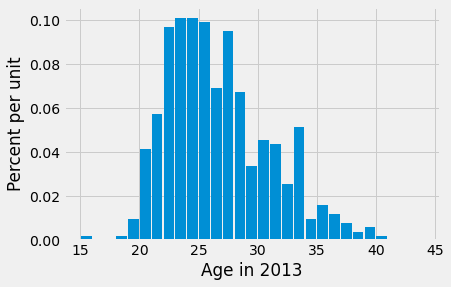

In [46]:
nba['Age in 2013'].hist(bins=np.arange(15, 45, 1), density=True, rwidth=0.9)
plt.ylabel("Percent per unit")
plt.xlabel('Age in 2013')
plt.show()

In [47]:
ages = nba['Age in 2013']
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)